# Import Packages & Datasets

In [13]:
# Data manipulation
import pandas as pd

# Modeling and plotting
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
# Import datasets
train = pd.read_csv("/Users/jessietam/Desktop/MLProject21_train.csv")
valid = pd.read_csv("/Users/jessietam/Desktop/MLProject21_valid.csv")
test = pd.read_csv("/Users/jessietam/Desktop/MLProject21_test.csv")

# Clean & Scale Training & Validation

In [4]:
# Create Column Index
columns = train.columns

# Convert categorical to dummy variables
train = pd.get_dummies(train)

# sample 50,000 observations
train=train.sample(50000,random_state=123)

# Separate predictors from targets
x_train = train.drop(columns = ['binary.target1', 'binary.target2', 'cont.target'])
y_train = train['binary.target1']

# Repeat for validation set
columns = valid.columns
valid = pd.get_dummies(valid)
valid = valid.sample(50000,random_state=1234)
x_valid = valid.drop(columns = ['binary.target1', 'binary.target2', 'cont.target'])
y_valid = valid['binary.target1']

In [5]:
# create scaler and scale traning
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)

# Repeat scaling for validation set
x_valid = scaler.transform(x_valid)

# Create Linear, RBF, & Polynomial SVC Models

In [7]:
# create Linear SVC & Gaussian RBF classifer
clf = LinearSVC(dual=False, fit_intercept=True, max_iter=50000, random_state=123)
rbf_svc = svm.SVC(kernel='rbf', gamma='scale', random_state=123,probability=True)
poly_svc = svm.SVC(kernel='poly', degree=3, random_state=123,probability=True)

# fit models to training
clf.fit(x_train, y_train)
rbf_svc.fit(x_train, y_train)
poly_svc.fit(x_train, y_train)

# score training
score_train = clf.score(x_train, y_train)
score_train_rbf = rbf_svc.score(x_train, y_train)
score_train_poly = poly_svc.score(x_train, y_train)

# Prediction & Model Accuracy

In [8]:
# predict training
train_pred = clf.predict(x_train)
train_pred_rbf = rbf_svc.predict(x_train)
train_pred_poly = poly_svc.predict(x_train)

In [9]:
# confusion matrix
tn,fp,fn,tp = confusion_matrix(y_train, train_pred).ravel()
tn_rbf,fp_rbf,fn_rbf,tp_rbf = confusion_matrix(y_train, train_pred_rbf).ravel()
tn_poly,fp_poly,fn_poly,tp_poly = confusion_matrix(y_train, train_pred_poly).ravel()

# Positive Prediction Value
ppv= tp/(tp+fp)
ppv_rbf = tp_rbf/(tp_rbf+fp_rbf)
ppv_poly = tp_poly/(tp_poly+fp_poly)

# Area Under Curve
fpr, tpr, threshold = roc_curve(y_train, train_pred, pos_label=1)
auc_train = auc(fpr,tpr)

print("Training Score:", score_train)
print("Training Positive Prediction Value:", ppv)
print("Training Area Under Curve:", auc_train)


fpr_rbf, tpr_rbf, threshold_rbf = roc_curve(y_train, train_pred_rbf, pos_label=1)
auc_train_rbf = auc(fpr_rbf,tpr_rbf)

print("Training RBF Score:", score_train_rbf)
print("Training RBF Positive Prediction Value:", ppv_rbf)
print("Training RBF Area Under Curve:", auc_train_rbf)


fpr_poly, tpr_poly, threshold_poly = roc_curve(y_train, train_pred_poly, pos_label=1)
auc_train_poly = auc(fpr_poly,tpr_poly)

print("Training Polynomial Score:", score_train_poly)
print("Training Polynomial Positive Prediction Value:", ppv_poly)
print("Training Polynomial Area Under Curve:", auc_train_poly)

Training Score: 0.87378
Training Positive Prediction Value: 0.5840589417280643
Training Area Under Curve: 0.5592950384155697
Training RBF Score: 0.90046
Training RBF Positive Prediction Value: 0.9168858495528669
Training RBF Area Under Curve: 0.6309914347647214
Training Polynomial Score: 0.91548
Training Polynomial Positive Prediction Value: 0.956964006259781
Training Polynomial Area Under Curve: 0.6851099323703709


# Model on Validation

In [10]:
# score validation
score_valid = clf.score(x_valid, y_valid)
score_valid_rbf = rbf_svc.score(x_valid, y_valid)
score_valid_poly = poly_svc.score(x_valid, y_valid)

# predict validation
valid_pred = clf.predict(x_valid)
valid_pred_rbf = rbf_svc.predict(x_valid)
valid_pred_poly = poly_svc.predict(x_valid)


pred_probs = clf._predict_proba_lr(x_valid)
pred_probs_rbf = rbf_svc.predict_proba(x_valid)
pred_probs_poly = poly_svc.predict_proba(x_valid)

In [11]:
# confusion matrix
tn,fp,fn,tp = confusion_matrix(y_valid, valid_pred).ravel()
tn_rbf,fp_rbf,fn_rbf,tp_rbf = confusion_matrix(y_valid, valid_pred_rbf).ravel()
tn_poly,fp_poly,fn_poly,tp_poly = confusion_matrix(y_valid, valid_pred_poly).ravel()

# Positive Prediction Value
ppv = tp/(tp+fp)
ppv_rbf = tp_rbf/(tp_rbf+fp_rbf)
ppv_poly = tp_poly/(tp_poly+fp_poly)


# Area Under Curve
fpr, tpr, threshold = roc_curve(y_valid, valid_pred, pos_label=1)
auc_valid = auc(fpr,tpr)

print("Validation Score:", score_valid)
print("Validation Positive Prediction Value:", ppv)
print("Validation Area Under Curve:", auc_valid)


fpr_rbf, tpr_rbf, threshold_rbf = roc_curve(y_valid, valid_pred_rbf, pos_label=1)
auc_valid_rbf = auc(fpr_rbf,tpr_rbf)

print("Validation RBF Score:", score_valid_rbf)
print("Validation RBF Positive Prediction Value:", ppv_rbf)
print("Validation RBF Area Under Curve:", auc_valid_rbf)


fpr_poly, tpr_poly, threshold_poly = roc_curve(y_valid, valid_pred_poly, pos_label=1)
auc_valid_poly = auc(fpr_poly,tpr_poly)

print("Validation Polynomial Score:", score_valid_poly)
print("Validation Polynomial Positive Prediction Value:", ppv_poly)
print("Validation Polynomial Area Under Curve:", auc_valid_poly)

Validation Score: 0.86748
Validation Positive Prediction Value: 0.5757396449704142
Validation Area Under Curve: 0.6195845884827925
Validation Score: 0.86258
Validation Positive Prediction Value: 0.5507026205848842
Validation Area Under Curve: 0.5877689643105041
Validation Polynomial Score: 0.85646
Validation Polynomial Positive Prediction Value: 0.4957617909150185
Validation Polynomial Area Under Curve: 0.6327150500229196


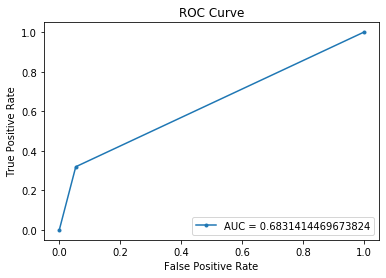

In [29]:
plt.figure()
plt.plot(fpr_poly, tpr_poly, marker=".", label=f"AUC = {roc_auc_score(y_valid, pred_probs_poly[:, -1])}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")